In [2]:
import pandas as pd
import seaborn as sns

/var/folders/vv/ppy3x1qd5kl5tbxm42zdt0nh0000gp/T/ipykernel_4627/432526209.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Reviews dataset

## Load data

In [3]:
raw_reviews_df = pd.read_csv("../data/0_raw/app_reviews/googleplaystore_user_reviews.csv")



## Columns and row counts

In [41]:
raw_reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [5]:
raw_reviews_df.shape

(64295, 5)

In [31]:
raw_reviews_df.drop_duplicates().shape

#TODO: Drop duplicates

(30679, 5)

In [32]:
raw_reviews_df = raw_reviews_df.drop_duplicates()

In [33]:
raw_reviews_df.loc[0]

App                                                   10 Best Foods for You
Translated_Review         I like eat delicious food. That's I'm cooking ...
Sentiment                                                          Positive
Sentiment_Polarity                                                      1.0
Sentiment_Subjectivity                                             0.533333
Name: 0, dtype: object

## Check for null values

In [35]:
raw_reviews_df.describe(include='all')

# 1074 apps
# 27994 reviews
# TODO: drop nulls in Translated_Review - ~1k
# No score with the review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,30679,29692,29697,29697.000000,29697.000000
unique,1074,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,131,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188836,0.490848
std,NaN,NaN,NaN,0.355672,0.266029
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422500,0.652500


## Which apps have most reviews

<Axes: xlabel='App'>

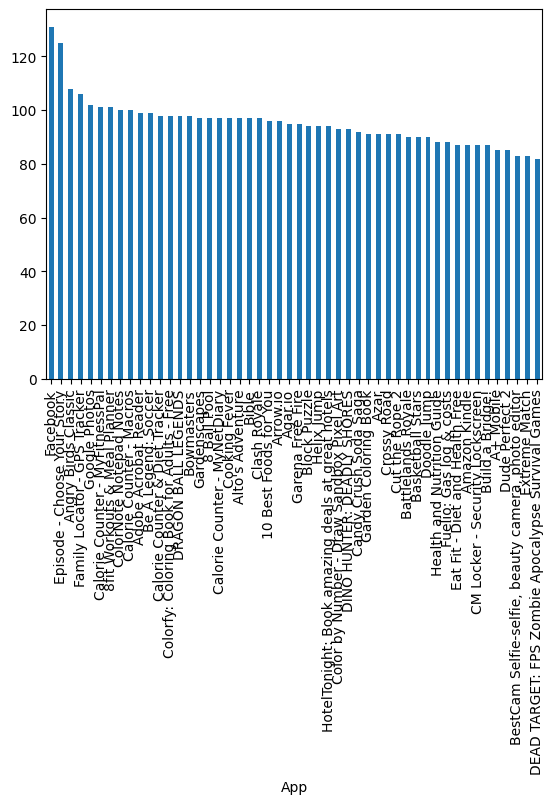

In [36]:
raw_reviews_df.drop_duplicates().groupby("App").size().sort_values(ascending=False)[:50].plot.bar()

In [37]:
raw_reviews_df.groupby("App").size().sort_values(ascending=False)[:50]

App
Facebook                                              131
Episode - Choose Your Story                           125
Angry Birds Classic                                   108
Family Locator - GPS Tracker                          106
Google Photos                                         102
Calorie Counter - MyFitnessPal                        101
8fit Workouts & Meal Planner                          101
ColorNote Notepad Notes                               100
Calorie Counter - Macros                              100
Adobe Acrobat Reader                                   99
Be A Legend: Soccer                                    99
Calorie Counter & Diet Tracker                         98
Colorfy: Coloring Book for Adults - Free               98
DRAGON BALL LEGENDS                                    98
Bowmasters                                             98
Gardenscapes                                           97
8 Ball Pool                                            97
Calorie Co

## Distribution of number of reviews per app

<Axes: ylabel='Frequency'>

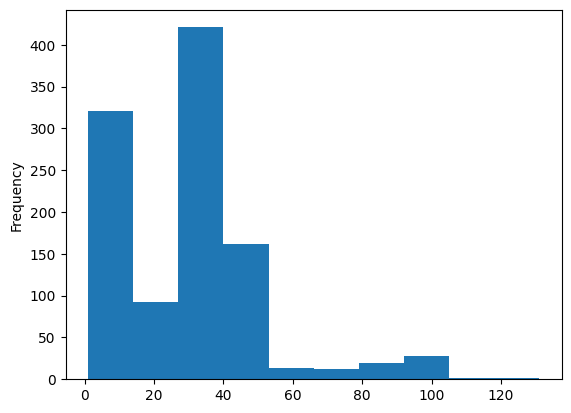

In [38]:
raw_reviews_df.groupby("App").size().sort_values(ascending=False).plot.hist()

# Apps dataset

## Load data

In [40]:
raw_apps_df = pd.read_csv("../data/0_raw/app_metadata/googleplaystore.csv")

In [42]:
## Columns and row counts

In [44]:
raw_apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [46]:
raw_apps_df.shape

(10841, 13)

In [48]:
raw_apps_df.drop_duplicates().shape

# TODO: Drop duplicates

(10358, 13)

In [49]:
raw_apps_df = raw_apps_df.drop_duplicates()

In [51]:
raw_apps_df.loc[0]

# TODO: Installs, Size - turn into numeric?


App               Photo Editor & Candy Camera & Grid & ScrapBook
Category                                          ART_AND_DESIGN
Rating                                                       4.1
Reviews                                                      159
Size                                                         19M
Installs                                                 10,000+
Type                                                        Free
Price                                                          0
Content Rating                                          Everyone
Genres                                              Art & Design
Last Updated                                     January 7, 2018
Current Ver                                                1.0.0
Android Ver                                         4.0.3 and up
Name: 0, dtype: object

## Check for null values

In [53]:
raw_apps_df.describe(include='all')

# 9660 apps
# 34 categories
# Nulls in Rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10358,10358,8893.000000,10358,10358,10358,10357,10358,10357,10358,10358,10350,10355
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,1488,9591,9592,8382,842,298,1302,2379
mean,NaN,NaN,4.189542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.545452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## How many apps can be found across both datasets

In [55]:
combined_df = raw_reviews_df.merge(raw_apps_df, how="inner", on="App")
combined_df.shape

# Something being exploded

(41661, 17)

In [70]:
print(raw_apps_df["App"].nunique())
print(raw_apps_df["App"].count())

# TODO: Some apps have multiple records

9660
10358


In [76]:
counts = raw_apps_df.groupby("App").size().sort_values(ascending=False)
duplicated_apps = counts[counts>1]
duplicated_apps

App
ROBLOX                                 9
8 Ball Pool                            7
Helix Jump                             6
Zombie Catchers                        6
Bubble Shooter                         6
                                      ..
All Social Networks                    2
All Football - Latest News & Videos    2
wetter.com - Weather and Radar         2
Airbnb                                 2
Agar.io                                2
Length: 523, dtype: int64

In [80]:
raw_apps_df[raw_apps_df["App"].isin(duplicated_apps.index)].sort_values("App")

# Main difference seems to be that reviews count is different

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2590,textPlus: Free Text & Calls,SOCIAL,4.1,382120,28M,"10,000,000+",Free,0,Everyone,Social,"July 26, 2018",7.3.1,4.1 and up
2964,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3055,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3652,wetter.com - Weather and Radar,WEATHER,4.2,189313,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [81]:
combined_df = raw_reviews_df.merge(raw_apps_df[["App", "Category"]].drop_duplicates(), how="inner", on="App")
combined_df.shape

(30619, 6)

In [63]:
combined_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [85]:
counts = combined_df.drop_duplicates().groupby(["App", "Translated_Review"]).size().sort_values(ascending=False)
# counts[counts>1]

# 1389 reviews still being duplicated



## Which categories have most reviews

In [84]:
cleansed_raw_reviews_df = raw_reviews_df[["App", "Translated_Review"]]
cleansed_raw_apps_df = raw_apps_df[["App", "Category"]].drop_duplicates()

cleansed_combined_df = cleansed_raw_reviews_df.merge(cleansed_raw_apps_df, how="inner", on="App")
cleansed_combined_df.shape

(30619, 3)

<Axes: xlabel='Category'>

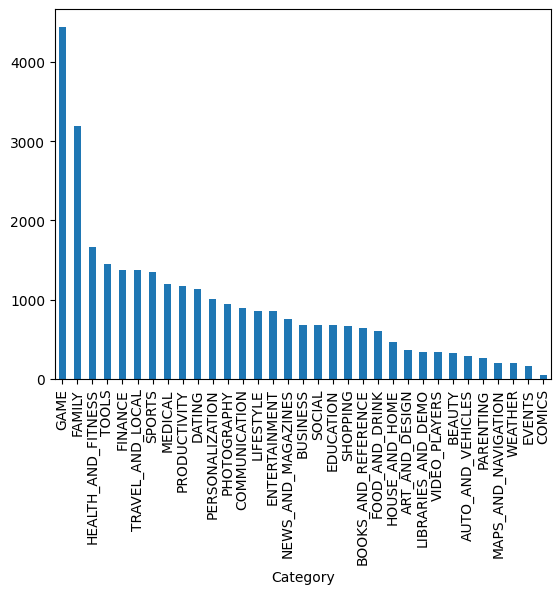

In [86]:
cleansed_combined_df.drop_duplicates().groupby("Category").size().sort_values(ascending=False)[:50].plot.bar()